----------------------------------------------------------------------------------

#                 Juan José Cerquera González - Juan Esteban Ruiz Pinilla - Juan David Ortega Murcia

----------------------------------------------------------------------------------

# Modelo de inteligencia artifical de cinematica inversa Robot Puma 560

## Abstract

Artificial intelligence has become a relevant topic today, its use in a wide variety of fields has been the subject of numerous investigations. Robotics is one of the areas where the application of artificial intelligence can offer important advances. Inverse kinematics is a complex problem that involves determining the values of a robot's joints that allow it to reach a specific position and orientation in space. 

This work shows how the TensorFlow library can be used to develop an artificial intelligence model to calculate the inverse kinematics of the Puma560 robot.The proposed solution is based on the use of a CSV file generated with the Robotic Toolbox library, which contains kinematic information of the robot. Using this information, the AI model developed with TensorFlow can calculate the joint values required for the robot to reach a specific position in space.

## Introducción

La cinemática inversa es un campo fundamental en la robótica que se enfoca en calcular la posición y la orientación de un robot basándose en la posición y orientación de sus actuadores [1]. Uno de los robots más conocidos en la industria es el Puma 560, desarrollado por Unimation en la década de 1980 [2]. En este robot, se han propuesto diversas soluciones de cinemática inversa utilizando una variedad de técnicas, como redes neuronales, enfoques de optimización iterativos y soluciones de control robusto adaptativo [3]. Estos enfoques han demostrado mejorar significativamente la precisión y velocidad de cálculo de la cinemática inversa del Puma 560 [4]. Además, se han llevado a cabo investigaciones sobre el modelo dinámico del Puma 560 [5]. Aunque el Puma 560 sigue siendo un robot muy utilizado en la industria, ha habido avances significativos en la robótica desde su desarrollo original [2]. Sin embargo, las investigaciones sobre la cinemática inversa del Puma 560 continúan siendo relevantes, ya que proporcionan información valiosa sobre cómo resolver problemas de movimiento en los robots [1, 6].

Unos ejemplos son: "Topología de una RNA para calcular la cinemática inversa del Puma 560 para aplicaciones en tiempo real"[7, 9], donde se propone una red neuronal artificial (RNA) que resuelve la cinemática inversa del robot Puma 560. La red neuronal se entrena utilizando un algoritmo genético y se valida con datos experimentales. Los resultados demuestran una precisión promedio de menos del 1% de error y un tiempo de respuesta inferior a 1 ms, lo que la hace adecuada para aplicaciones en tiempo real. Por otra parte esta, "Modelado y simulación dinámica del robot industrial Staübli Unimation PUMA 560"[8], en este se estudia el modelo cinemático directo e inverso, así como el modelo dinámico inverso del robot Puma 560. Se realiza una comparación entre el modelo matemático desarrollado en MATLAB y la simulación realizada en ADAMS View. El estudio incluye la modelización matemática de la cinemática y dinámica del robot, así como la simulación gráfica y numérica en ADAMS View. Otro ejemplo de investigación es "Modelar la cinemática inversa y directa de un robot PUMA 560 usando el álgebra de Cuaterniones y una trayectoria helicoidal"[10], se presenta el uso del álgebra de cuaterniones para modelar la cinemática inversa y directa del Puma 560. El enfoque simplifica las ecuaciones y evita singularidades. Se aplica el modelo a una trayectoria helicoidal, que tiene aplicaciones en industria y medicina. El modelo se implementa en Mathematica® V5 y se comparan los resultados con otros métodos existentes.

## Metodologia 

### Importación de librerías

In [1]:
import os
import pandas as pd
import tensorflow as tf
import random
import seaborn as sns
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH
import roboticstoolbox as rtb

2023-05-08 11:37:10.561703: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-08 11:37:10.563386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 11:37:10.593925: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-08 11:37:10.594537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 11:37:11.184781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Creación de la base de datos con extención .csv

In [ ]:
# Definir la configuración del brazo robótico Puma560
puma = rtb.models.DH.Puma560()

# Generar los datos de entrenamiento y guardarlos en un archivo CSV
archivo_csv = "datos_puma560C.csv"
archivo_existe = os.path.isfile(archivo_csv)

n = 30000

with open(archivo_csv, mode='a', newline='') as archivo:
    escritor_csv = csv.writer(archivo)
    if not archivo_existe:
        escritor_csv.writerow(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'X', 'Y', 'Z', 'Rx', 'Ry', 'Rz'])
    for i in range(n):
        q = np.around([random.uniform(0, np.pi), random.uniform(-np.pi / 2, np.pi / 2),
                       random.uniform(-np.pi / 2, np.pi / 2), random.uniform(-np.pi / 2, np.pi / 2),
                       random.uniform(-np.pi / 2, np.pi / 2), random.uniform(-np.pi, np.pi)], 4)
        T = puma.fkine(q)
        xyz = np.around(T.t, 5)
        rpy = np.around(T.rpy('deg'), 5)
        nueva_fila = np.concatenate([q, xyz, rpy])
        escritor_csv.writerow(nueva_fila)

# Cargar los datos desde el archivo CSV
df = pd.read_csv(archivo_csv)

### Carga de la base de datos

In [67]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_puma560C.csv')


### Validación de la información de la base de datos

In [4]:
data.info

<bound method DataFrame.info of            Q1      Q2      Q3      Q4      Q5      Q6        X        Y  \
0      1.0480 -0.0965  0.8757 -0.9865 -1.2988 -0.7118  0.20031  0.04708   
1      1.8443  0.1976  0.7328  1.1097 -0.7141 -0.3215  0.12036  0.12650   
2      3.0274 -1.1621  0.5175 -0.8999  1.2600 -1.9082 -0.42728  0.20004   
3      2.8585  0.3636 -0.9494  1.5617 -1.3004  0.0618 -0.59106  0.32821   
4      2.3544  1.5620  0.4571 -0.9722  0.6521  0.1336  0.38448 -0.17328   
...       ...     ...     ...     ...     ...     ...      ...      ...   
29995  1.4731  0.4832  0.0041 -1.3543 -0.4518  1.5651  0.16866  0.18253   
29996  1.9181  0.5805 -0.8452  1.0699  0.2733 -1.5170 -0.02692  0.51523   
29997  0.1979 -0.5646 -0.6318 -0.8619  0.2004 -0.0938  0.78849  0.00507   
29998  1.6267  0.8921  1.0317  0.6038 -0.8028 -0.6799  0.15770 -0.13251   
29999  3.0256 -1.0362 -1.5690  1.4802 -0.5613  2.4792 -0.40301  0.19802   

             Z         Rx        Ry         Rz  
0      0.95171    

In [5]:
data.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,X,Y,Z,Rx,Ry,Rz
0,1.0480,-0.0965,0.8757,-0.9865,-1.2988,-0.7118,0.20031,0.04708,0.95171,6.48653,55.37854,-8.83360
1,1.8443,0.1976,0.7328,1.1097,-0.7141,-0.3215,0.12036,0.12650,1.03088,-46.41047,-6.39758,135.97785
2,3.0274,-1.1621,0.5175,-0.8999,1.2600,-1.9082,-0.42728,0.20004,0.60855,51.92846,-13.29673,24.87780
3,2.8585,0.3636,-0.9494,1.5617,-1.3004,0.0618,-0.59106,0.32821,1.17398,70.09964,50.23345,-40.90630
4,2.3544,1.5620,0.4571,-0.9722,0.6521,0.1336,0.38448,-0.17328,0.93475,132.22594,-13.79733,-8.74603
5,0.1528,0.5651,1.5171,0.1931,1.3018,2.3089,0.00127,-0.15162,0.70944,162.92609,-2.32810,52.56334
6,1.8801,-1.0916,0.4932,-0.5245,0.3021,-2.4101,0.00318,0.48299,0.63400,3.87062,-20.60508,-58.53364
7,0.6084,0.9772,-0.7988,1.1889,-0.8730,-1.7476,0.23747,-0.01746,1.45831,-44.51527,-16.69424,5.35380
8,0.1052,-0.1724,-0.6114,-0.8027,-0.3579,0.3957,0.75626,-0.07103,0.88924,-21.72087,58.05510,-35.93809
9,0.8567,-0.5845,0.7106,-0.3951,1.4425,1.2900,0.32687,0.14804,0.86449,-89.28516,-18.86190,116.41121


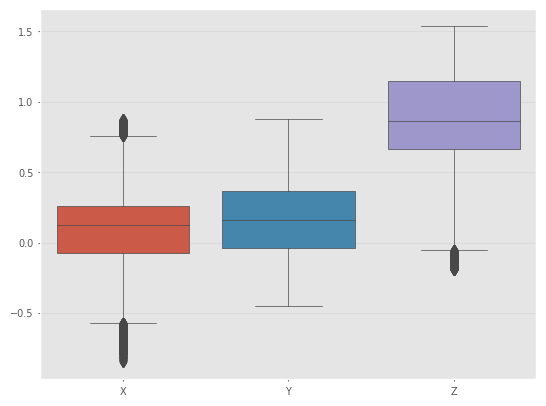

In [ ]:
sns.boxplot(data=data[['X', 'Y', 'Z']])
plt.show()

Diagrama de cajas para poder interpretar el comportamiento de las pocisiones x,y,z

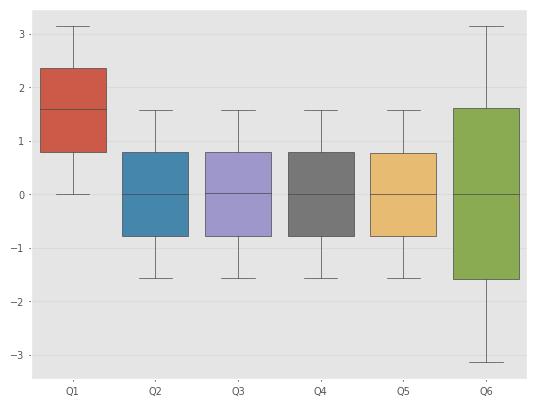

In [18]:
sns.boxplot(data=data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']])
plt.show()

Diagrama de cajas para poder interpretar el comportamiento de las variables 'q'

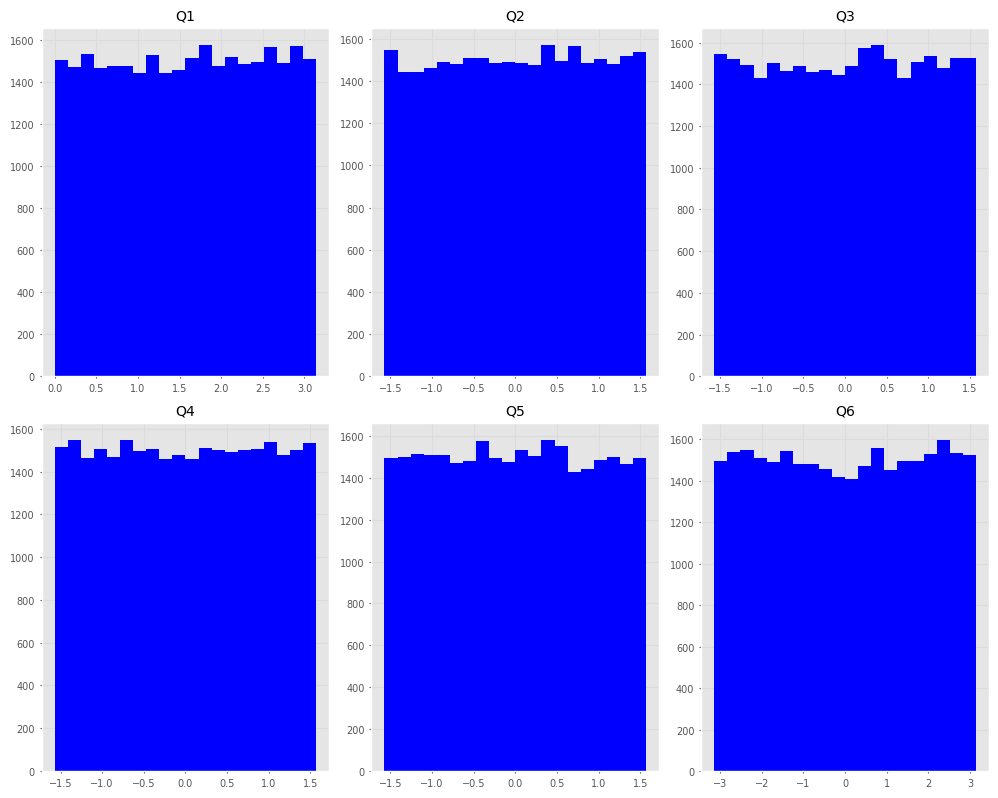

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,8))

for ax, column in zip(axs.flatten(), ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']):
    ax.hist(data[column], bins=20, color='blue')
    ax.set_title(column)

plt.tight_layout()
plt.show()


### Preparación previa al entrenamiento y entrenamiento con las entradas (X,Y,Z) y (RPY)

In [ ]:
# Separar los datos de entrada (X) y de salida (Y)
X_position = data[['X', 'Y', 'Z']].values
X_orientation = data[['Rx', 'Ry', 'Rz']].values
Y = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values


# Definir las entradas del modelo
position_inputs = tf.keras.layers.Input(shape=(3,))
orientation_inputs = tf.keras.layers.Input(shape=(3,))


# Procesar la entrada de posición
x_position = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(position_inputs)
x_position = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(x_position)

# Procesar la entrada de orientación
x_orientation = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(orientation_inputs)
x_orientation = tf.keras.layers.Dense(256, activation= tf.keras.layers.ELU(alpha=1.0))(x_orientation)

# Combinar las salidas de posición y orientación
x = tf.keras.layers.concatenate([x_position, x_orientation])

# Agregar capas adicionales y definir la salida del modelo
x = tf.keras.layers.Dense(256, activation= tf.keras.layers.ELU(alpha=1.0))(x)
x = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(x)
outputs = tf.keras.layers.Dense(6)(x)



# Definir el modelo completo
model = tf.keras.Model(inputs=[position_inputs, orientation_inputs], outputs=outputs)

# Compilar el modelo
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit([X_position, X_orientation], Y, batch_size=60, epochs=400, validation_split=0.2)


Epoch 1/400
400/400 [==============================] - 5s 6ms/step - loss: 1.6048 - accuracy: 0.5623 - val_loss: 0.7749 - val_accuracy: 0.6258
Epoch 2/400
400/400 [==============================] - 2s 5ms/step - loss: 0.7444 - accuracy: 0.6468 - val_loss: 0.7181 - val_accuracy: 0.6585
Epoch 3/400
400/400 [==============================] - 2s 4ms/step - loss: 0.6790 - accuracy: 0.6665 - val_loss: 0.6433 - val_accuracy: 0.6957
Epoch 4/400
400/400 [==============================] - 2s 4ms/step - loss: 0.6429 - accuracy: 0.6854 - val_loss: 0.6551 - val_accuracy: 0.7087
Epoch 5/400
400/400 [==============================] - 2s 4ms/step - loss: 0.6221 - accuracy: 0.6874 - val_loss: 0.6412 - val_accuracy: 0.6855
Epoch 6/400
400/400 [==============================] - 2s 4ms/step - loss: 0.6031 - accuracy: 0.6956 - val_loss: 0.6097 - val_accuracy: 0.7040
Epoch 7/400
400/400 [==============================] - 2s 6ms/step - loss: 0.5873 - accuracy: 0.7023 - val_loss: 0.6096 - val_accuracy: 0.7060

### Validación de las métricas del modelo (Accuracy)

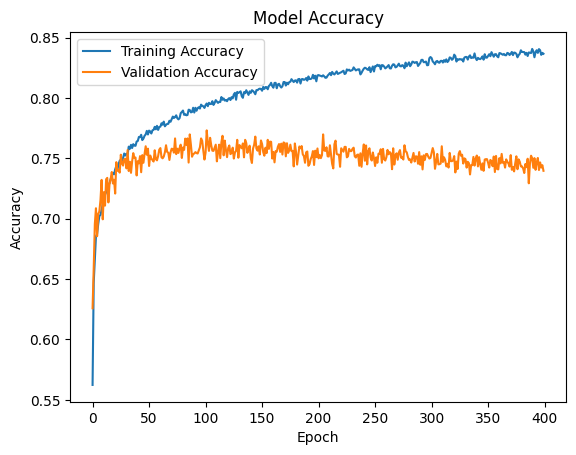

In [ ]:
# Obtener la precisión del modelo en el conjunto de entrenamiento y validación
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Graficar la precisión del modelo en función del número de epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Guardar el modelo


In [ ]:
# Para guardar el modelo
model.save('Model83.h5')

### Si ya tiene el modelo, aquí se carga:

In [65]:
# Cargar el modelo
model = tf.keras.models.load_model('Model83.h5')

2023-05-08 12:12:31.117712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-05-08 12:12:31.117740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: cerquera-Nitro-AN515-57
2023-05-08 12:12:31.117744: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: cerquera-Nitro-AN515-57
2023-05-08 12:12:31.117953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 515.105.1
2023-05-08 12:12:31.117967: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 515.105.1
2023-05-08 12:12:31.117970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 515.105.1


In [68]:
from sklearn.metrics import mean_absolute_error


X_position = data[['X', 'Y', 'Z']].values
X_orientation = data[['Rx', 'Ry', 'Rz']].values
Y = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values


# Predecir las salidas del modelo para los datos de prueba
Y_pred = model.predict([X_position, X_orientation])

# Calcular el error MAE en los datos de prueba
mae = mean_absolute_error(Y, Y_pred)

print("Error MAE: ", mae)


938/938 [==============================] - 1s 594us/step
Error MAE:  0.27591971007051286


### Validación del accuracy con las variables de testeo y cálculo del coeficiente de determinación R²

In [69]:
test_data = data.copy()
# Obtener los datos de prueba
X_test_position = test_data[['X', 'Y', 'Z']].values
X_test_orientation = test_data[['Rx', 'Ry', 'Rz']].values
y_test = test_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate([X_test_position, X_test_orientation], y_test)

# Hacer predicciones con el modelo en los datos de prueba
y_test_predictions = model.predict([X_test_position, X_test_orientation])

# Calcular el coeficiente de determinación R^2 del modelo en los datos de prueba
r2 = r2_score(y_test, y_test_predictions)

# Imprimir la precisión y el R^2 del modelo en los datos de prueba
print(f"Accuracy: {test_accuracy:.2f}")
print(f"R^2: {r2:.2f}")


938/938 [==============================] - 1s 619us/step
Accuracy: 0.82
R^2: 0.84


### Prueba del modelo con la cinemática inversa

In [70]:
print(model.input)

[<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_9')>, <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_10')>]


In [87]:

roll, pitch, yaw = [51.92846,-13.29673,24.8778]
example_input = [np.array([[-0.42728,0.20004,0.60855]]), np.array([[roll, pitch, yaw]])]
predict = model.predict(example_input)

1/1 [==============================] - 0s 14ms/step


Valores de las predicciones de las Q

In [88]:
predict

array([[ 2.8493807, -1.080042 ,  0.5215881, -0.8756729,  1.1000698,
        -1.8188922]], dtype=float32)

Aplicación de las prediciones dentro del modelo Puma560 para hacer la comprobación


In [89]:
# Definir la configuración del brazo robótico Puma560
puma = rtb.models.DH.Puma560()
T = puma.fkine(predict)
T

   0.9278   -0.3713    0.03628  -0.3872    
   0.2799    0.6285   -0.7257    0.2732    
   0.2467    0.6834    0.6871    0.6464    
   0         0         0         1         


Valores reales

In [90]:
qreal = [3.0274,-1.1621,0.5175,-0.8999,1.26,-1.9082]
Treal = puma.fkine(qreal)
Treal

   0.8829   -0.4237    0.2025   -0.4273    
   0.4094    0.4833   -0.7739    0.2       
   0.23      0.7661    0.6001    0.6086    
   0         0         0         1         


### Realización de una segunda red neuronal con sólo las entradas: (XYZ)

In [ ]:
# Separar los datos de entrada (X, Y, Z) y de salida (Q1, Q2, Q3, Q4, Q5, Q6)
X = data[['X', 'Y', 'Z']].values
Y = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values


# Definir la arquitectura de la red neuronal
inputs = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(inputs)

x = tf.keras.layers.Dense(64, activation= tf.keras.layers.ELU(alpha=1.0))(x)
x = tf.keras.layers.Dense(256, activation= tf.keras.layers.ELU(alpha=1.0))(x)

x = tf.keras.layers.Dense(128, activation= tf.keras.layers.ELU(alpha=1.0))(x)

outputs = tf.keras.layers.Dense(6)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X, Y, batch_size=60, epochs=100, validation_split=0.2)

Epoch 1/100
400/400 [==============================] - 3s 4ms/step - loss: 1.0127 - accuracy: 0.5728 - val_loss: 0.9782 - val_accuracy: 0.6095
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 0.9364 - accuracy: 0.5996 - val_loss: 0.9292 - val_accuracy: 0.6200
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 0.9247 - accuracy: 0.6028 - val_loss: 0.9210 - val_accuracy: 0.6223
Epoch 4/100
400/400 [==============================] - 2s 4ms/step - loss: 0.9161 - accuracy: 0.6116 - val_loss: 0.9198 - val_accuracy: 0.6280
Epoch 5/100
400/400 [==============================] - 2s 4ms/step - loss: 0.9087 - accuracy: 0.6189 - val_loss: 0.9061 - val_accuracy: 0.6367
Epoch 6/100
400/400 [==============================] - 2s 4ms/step - loss: 0.9022 - accuracy: 0.6216 - val_loss: 0.9100 - val_accuracy: 0.6445
Epoch 7/100
400/400 [==============================] - 2s 4ms/step - loss: 0.8982 - accuracy: 0.6240 - val_loss: 0.9029 - val_accuracy: 0.6433

### Validación de Accuracy

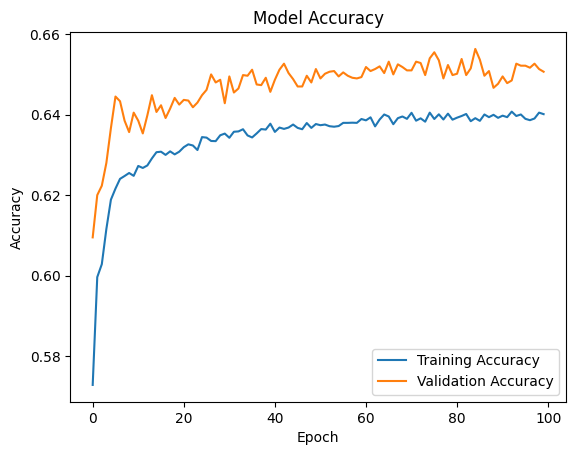

In [ ]:
# Obtener la precisión del modelo en el conjunto de entrenamiento y validación
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Graficar la precisión del modelo en función del número de epochs
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### Guardar el modelo


In [ ]:
# Para guardar el modelo
model.save('Modelxy.h5')

### Si ya tiene el modelo, aquí se carga:

In [91]:
# Cargar el modelo
model = tf.keras.models.load_model('Modelxy.h5')


In [92]:
from sklearn.metrics import mean_absolute_error


X = data[['X', 'Y', 'Z']].values
Y = data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values

# Predecir las salidas del modelo para los datos de prueba
Y_pred = model.predict(X)

# Calcular el error MAE en los datos de prueba
mae = mean_absolute_error(Y, Y_pred)

print("Error MAE: ", mae)


938/938 [==============================] - 1s 494us/step
Error MAE:  0.6013052312530528


### Validación del accuracy con las variables de testo y cálculo del coeficiente de determinación R²

In [93]:
from sklearn.metrics import r2_score

test_data = data.copy()
# Obtener los datos de prueba
X_test_position = test_data[['X', 'Y', 'Z']].values
y_test = test_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].values

# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate([X_test_position], y_test)

# Hacer predicciones con el modelo en los datos de prueba
y_test_predictions = model.predict([X_test_position])

# Calcular el coeficiente de determinación R^2 del modelo en los datos de prueba
r2 = r2_score(y_test, y_test_predictions)

# Imprimir la precisión y el R^2 del modelo en los datos de prueba
print(f"Accuracy: {test_accuracy:.2f}")
print(f"R^2: {r2:.2f}")


938/938 [==============================] - 1s 531us/step
Accuracy: 0.64
R^2: 0.45


### Prueba del modelo con la cinemática inversa

In [96]:
example_input = [[-0.42728,0.20004,0.60855]]
predict = model.predict(example_input)

1/1 [==============================] - 0s 25ms/step


Valores de las predicciones de las Q

In [97]:
predict

array([[ 3.07586   , -1.1329372 ,  0.5184656 ,  0.02021317,  0.05328713,
        -0.05789365]], dtype=float32)

Aplicación de las prediciones dentro del modelo Puma560 para hacer la comprobación


In [99]:
puma = rtb.models.DH.Puma560()
T = puma.fkine(predict[0])
T

  -0.8417   -0.09806  -0.531    -0.4378    
   0.09319  -0.995     0.03603   0.1792    
  -0.5319   -0.01915   0.8466    0.6219    
   0         0         0         1         


Valores reales

In [100]:
qreal = [3.0274,-1.1621,0.5175,-0.8999,1.26,-1.9082]
Treal = puma.fkine(qreal)
Treal

   0.8829   -0.4237    0.2025   -0.4273    
   0.4094    0.4833   -0.7739    0.2       
   0.23      0.7661    0.6001    0.6086    
   0         0         0         1         


### Prueba con pytorch

El modelo fue entrenado con tensor flow para obtener la mejor precisión después de ser probado con pytorch, el código usa los mismos datos que el anterior sin los valores de euler (roll, pitch y yaw) y una arquitectura normal en pytorch para que quede de la siguiente forma.

Las ibrerias que usa son las siguientes

In [3]:
import torch
import numpy as np
import pandas as pd
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

y el codigo es el siguiente:

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv('datos_puma560C1.csv')
X = df.drop(["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"], axis=1).values.astype('float32')
Y = df.drop(["X", "Y", "Z"], axis=1).values.astype('float32')

# Mover los datos al dispositivo de procesamiento (CPU o GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensors = torch.from_numpy(X).to(device)
y_tensors = torch.from_numpy(Y).to(device)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tensors, y_tensors, test_size=0.1, random_state=42)

# Crear una clase de conjunto de datos personalizada para PyTorch
class PumaDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.y_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

# Crear los conjuntos de datos DataLoader para la red neuronal
train_dataset = PumaDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=200, shuffle=True)

# Definir la arquitectura de la red neuronal
class PumaModel(nn.Module):
    def __init__(self):
        super(PumaModel, self).__init__()
        self.input_layer_to_hidden_layer_1 = nn.Linear(3, 200, bias=True)
        self.hidden_layer_1_to_hidden_layer_2 = nn.Linear(200, 128, bias=True)
        self.hidden_layer_2_to_hidden_layer_3 = nn.Linear(128, 128, bias=True)
        self.hidden_layer_3_to_hidden_layer_4 = nn.Linear(128, 128, bias=True)
        self.hidden_layer_6_to_output_layer = nn.Linear(128, 6, bias=True)

    def forward(self, x):
        x = self.input_layer_to_hidden_layer_1(x)
        x = nn.ELU()(x)
        x = self.hidden_layer_1_to_hidden_layer_2(x)
        x = nn.ELU()(x)
        x = self.hidden_layer_2_to_hidden_layer_3(x)
        x = nn.ELU()(x)
        x = self.hidden_layer_3_to_hidden_layer_4(x)
        x = nn.ELU()(x)
        x = self.hidden_layer_6_to_output_layer(x)
        x = nn.ELU()(x)
        return x

# Crear una instancia del modelo y moverlo al dispositivo de procesamiento
modelo = PumaModel()
modelo.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.RMSprop(modelo.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 300
train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad() # Establecer los gradientes en cero
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        y_pred = modelo(batch_x) # Hacer una predicción
        loss = criterion(y_pred, batch_y) # Calcular la pérdida
        loss.backward() # Retropropagación
        optimizer.step() # Actualización de pesos
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    # Calcular la pérdida y precisión en los conjuntos de entrenamiento y prueba
    with torch.no_grad():
        train_preds = modelo(X_train)
        train_loss = criterion(train_preds, y_train)
        test_preds = modelo(X_test)
        test_loss = criterion(test_preds, y_test)
        train_acc = 1 - (train_loss / torch.var(y_train))
        test_acc = 1 - (test_loss / torch.var(y_test))
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_accs.append(train_acc.item())
        test_accs.append(test_acc.item())

    if epoch % 20 == 0:
        print(f"Loss in Epoch {epoch}: {np.mean(train_losses)}")



Loss in Epoch 0: 0.961265230399591
Loss in Epoch 20: 0.8871136342196658
Loss in Epoch 40: 0.8785344675789035
Loss in Epoch 60: 0.8747447889576411
Loss in Epoch 80: 0.8724733739369092
Loss in Epoch 100: 0.8707681524390741
Loss in Epoch 120: 0.8693681653172809
Loss in Epoch 140: 0.8682087831494688
Loss in Epoch 160: 0.8672054563153878
Loss in Epoch 180: 0.8663003283445153
Loss in Epoch 200: 0.8654666025993989
Loss in Epoch 220: 0.8647093580289363
Loss in Epoch 240: 0.8639451890189985
Loss in Epoch 260: 0.8632486363742576
Loss in Epoch 280: 0.8625371558566927


la precisión se puede verficicar asi:

In [50]:
with torch.no_grad():
  train_preds = modelo(X_train)
  train_acc = torch.mean((train_preds - y_train)**2)

  test_preds = modelo(X_test)
  test_acc = torch.mean((test_preds - y_test)**2)

print(f"Epoch {epoch}, precision del entrenamiento: {train_acc:.3f}, precision de la prueba: {test_acc:.3f}")

Epoch 99, precision del entrenamiento: 0.866, precision de la prueba: 0.876


y queda verificado de la siguiente forma

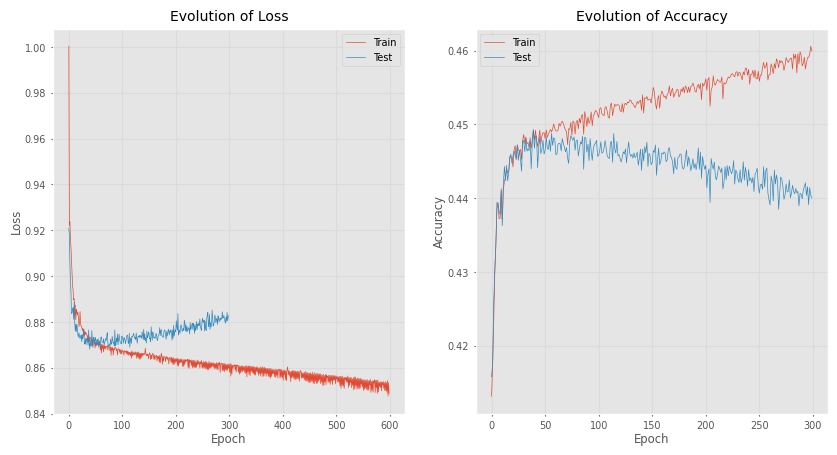

In [112]:
# graficar la evolución de la pérdida y la precisión en el entrenamiento y la prueba
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.title('Evolution of Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(test_accs, label='Test')
plt.title('Evolution of Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Guardar modelo

In [60]:
torch.save(modelo.state_dict(), 'Modelopythorch.pth')

Cargar modelo si ya se tiene

In [62]:
modelo.load_state_dict(torch.load('Modelopythorch.pth'))

<All keys matched successfully>

## RESULTADOS


### Gráfica Métrica accuracy XYZ

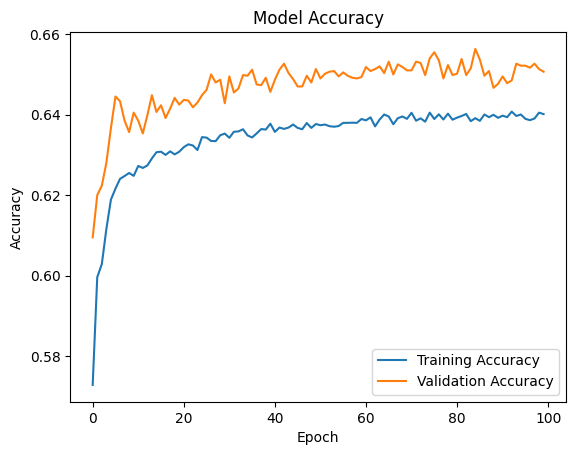

El modelo XYZ, tiene una precisión de entrenamiento de aproximadamente el 63% y su precisión de validación es de alrededor del 65%

### Gráfica Métrica accuracy XYZ & RPY

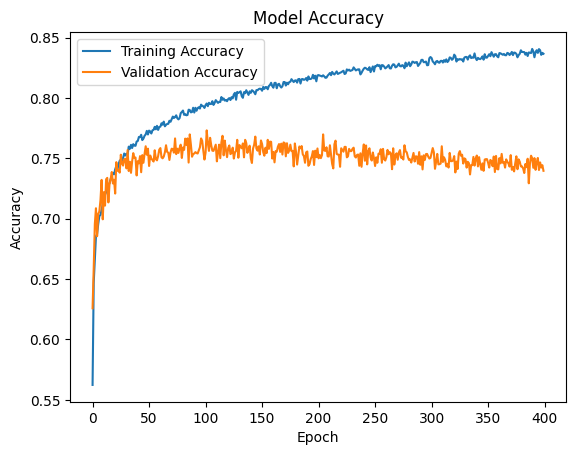

El modelo XYZ y RPY tiene una precisión de entrenamiento de casi 85% y su precisión de validación es cercana del 75%

### Gráfica Métricas del modelo hecho con pytorch XYZ

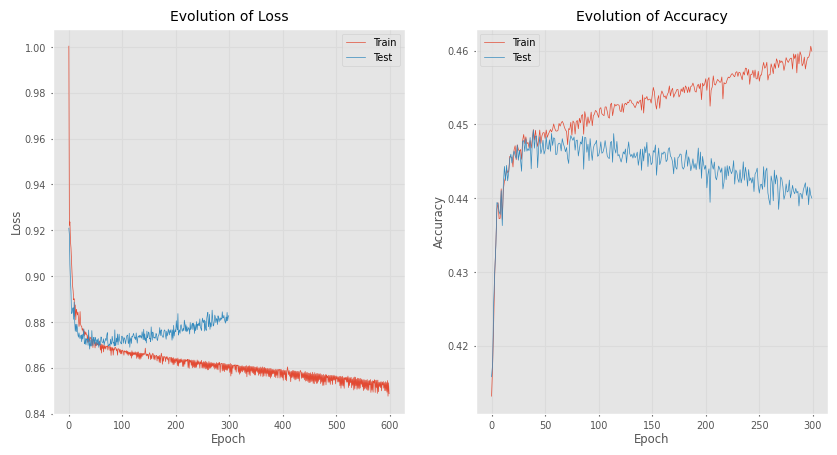

El modelo XYZ tiene una precisión de 46% 

## Conclusion

*   En conclusión, a pesar que el modelo de IA generado se puede aproximar a los valores de la ubicación deseada con los qs generados, no suele acertar en todos los casos. Por lo tanto sigue siendo más factible el uso de librerias como Robotic Toolbox, o lo metodos númericos como el de Newton o gradiente para el calculo de la cinematica inversa.

*   Los diferentes modelos generados se puede evidenciar que el que recibe inputs como Row, Pitch, Yaw, X, Y, y Z, llega a ser más preciso que el modelo que X, Y, Z, ya que el segundo solo alcanza a una tasa de precisión de 63%, y un 65% de validación. Mientras que el primero alcanza precisiones del 85% y un 75% de validación, teniendo así diferencias de casi el 20% de exactitud ambos modelos. Por otra parte, también se logró evidenciar que para el desarrollo del modelo de inteligencia artificial, la precisión era mayor con el de TensoFlow a comparación de Pytorch ya que el primero lograba valores del 60-70% mientras que con el segundo solamente se llegaba menos del 46%.

*  Para mejorar el modelo de inteligencia artificial se podría llegar a generar más datos para el dataset, y entrenarla con un valor mayor de epocas, sin embargo esto sería un proceso algo más tardado y requerrirá mayores recursos computacionales. 


## Referencias

[1] S. M. LaValle, "Planning Algorithms," 2013.

[2] J. J. Craig, "Introduction to Robotics: Mechanics and Control," 3rd ed., 2005.

[3] K. E. Holmberg and K. J. Waldron, "A survey of robot kinematics literature," 1987.

[4] H. Seraji and K. Iagnemma, "Kinematic Analysis of Redundant Robot Manipulators," 2004.

[5] M. W. Spong, S. Hutchinson, and M. Vidyasagar, "Robot Modeling and Control," 2006.

[6] S. M. LaValle, "Planning Algorithms," 2013.

[7] D. Bedolla-Martínez y F. Trujillo-Romero, "Topología de una RNA para calcular la cinemática inversa del Puma 560 para aplicaciones en tiempo real", Revista Cubana de Ciencias Informáticas, vol. 14, no. 8, pp. 30-43, dic. 2019.

[8] M. Simó Villanueva, "Modelado y simulación dinámica del robot industrial Staübli Unimation PUMA 560", Trabajo Fin de Grado, Grado en Ingeniería Mecánica, Universitat Politècnica de València, Valencia, jul. 2018.

[9] D. Bedolla-Martínez y F. Trujillo-Romero, "Topología de una RNA para calcular la cinemática inversa del Puma 560 para aplicaciones en tiempo real", [en línea]. Disponible: https://www.researchgate.net/profile/Felipe-Trujillo-Romero/publication/339204190_Topologia_de_una_RNA_para_calcular_la_cinematica_inversa_del_Puma_560_para_aplicaciones_en_tiempo_real/links/5e4fa6a2a6fdccd965b47d9e/Topologia-de-una-RNA-para-calcular-la-cinematica-inversa-del-Puma-560-para-aplicaciones-en-tiempo-real.pdf

[10] L. Olvera Aranzolo, "Modelar la cinemática inversa y directa de un robot PUMA 560 usando el álgebra de Cuaterniones y una trayectoria helicoidal", Tesis de Maestría en Ciencias Matemáticas Aplicadas e Industriales, Universidad Nacional Autónoma de México, México D.F., ago. 2007.